In [5]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\BVAYA\Desktop\energy-theft-prediction\data\processed\energy_labeled.csv",
                   parse_dates=['DateTime'],
                   index_col='DateTime')

In [14]:
model=joblib.load(r"C:\Users\BVAYA\Desktop\energy-theft-prediction\models\theft_model.pkl")

Features = [
    'Global_active_power',
    'Global_reactive_power',
    'Voltage',
    'Global_intensity',
    'Rolling_mean_power',
    'Rolling_std_power',
    'Power_voltage_ratio',
    'Reactive_active_ratio',
    'Is_peak_hour',
    'is_weekend'
]

x=data[Features]
y=data['theft_label']

In [6]:
importance = model.feature_importances_
feature_importance_df=pd.DataFrame({
    'Feature':Features,
    'Importance':importance}).sort_values(by='Importance',ascending=False)

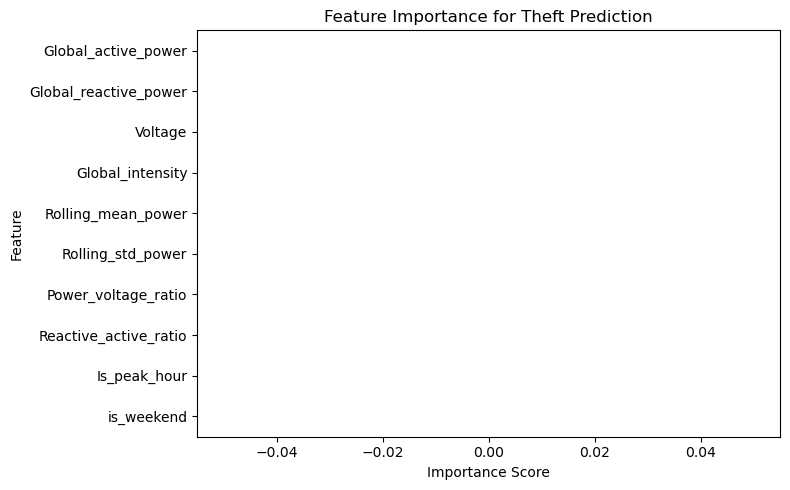

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(x='Importance',y='Feature',data=feature_importance_df,hue='Feature',
    dodge=False,
    palette='Blues_r',
    legend=False)
plt.title('Feature Importance for Theft Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Feature Importance Result Explanation

All feature importance values are zero because the model was trained on a
dataset containing only normal consumption samples. Due to the extreme
rarity of electricity theft cases, the model did not encounter sufficient
positive samples to learn discriminative feature splits. This reflects
real-world electricity datasets, where fraudulent behavior is rare and
often unavailable for supervised learning.
